In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

In [2]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

In [3]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

In [4]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

In [5]:
years = data.groupby("year").mean().index

In [6]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [7]:
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA","GBR", "ESP", "MEX")]
linestyles = ["-", ":","--","-."]

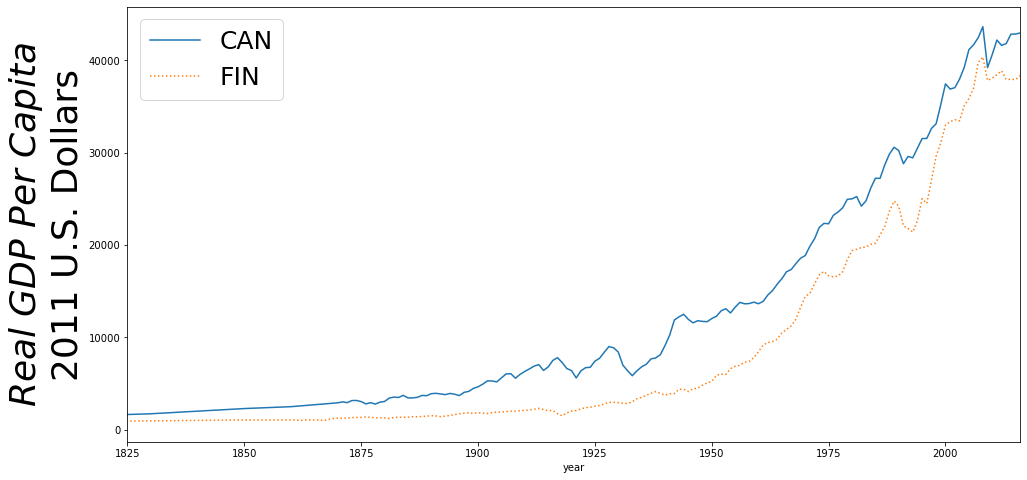

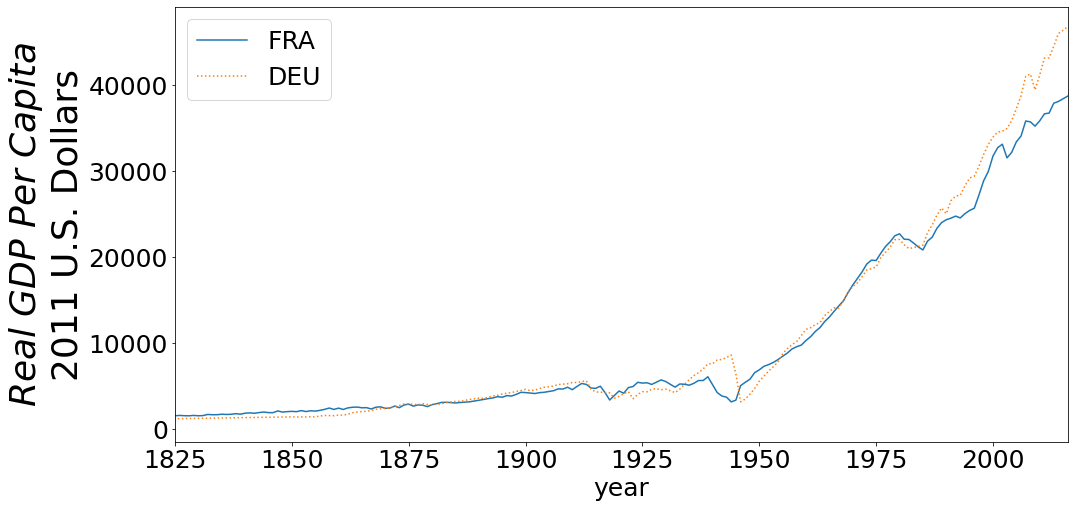

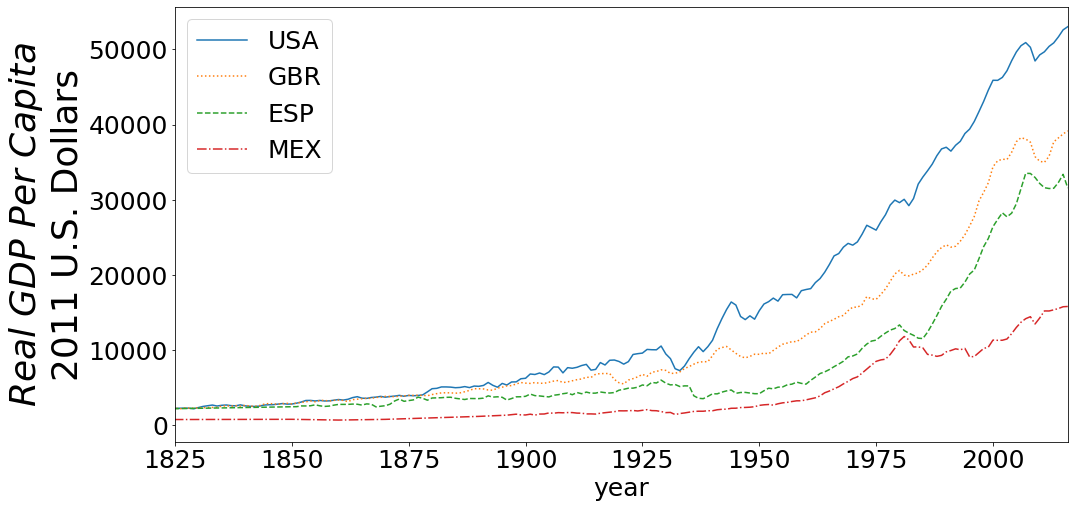

In [8]:
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()

In [9]:
fraser_data = pd.read_csv("cleanedEconFreedomData.csv",  
                           index_col = [0, 1], parse_dates=False)
fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  
  
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])

In [10]:
fraser_data["RGDP Per Capita"] = maddison_data["rgdpnapc"]
fraser_data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

In [12]:
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):
    data[indicator_name] = 0
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  

data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  

index_name = data.index.names[0]  
indicator_name = "North America"
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

In [13]:
data[["North America"]]

North America
ISO_Code Year                     
ALB      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
...                            ...
ZWE      2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0

[3030 rows x 1 columns]

Text(0.5, 1.0, '2000')

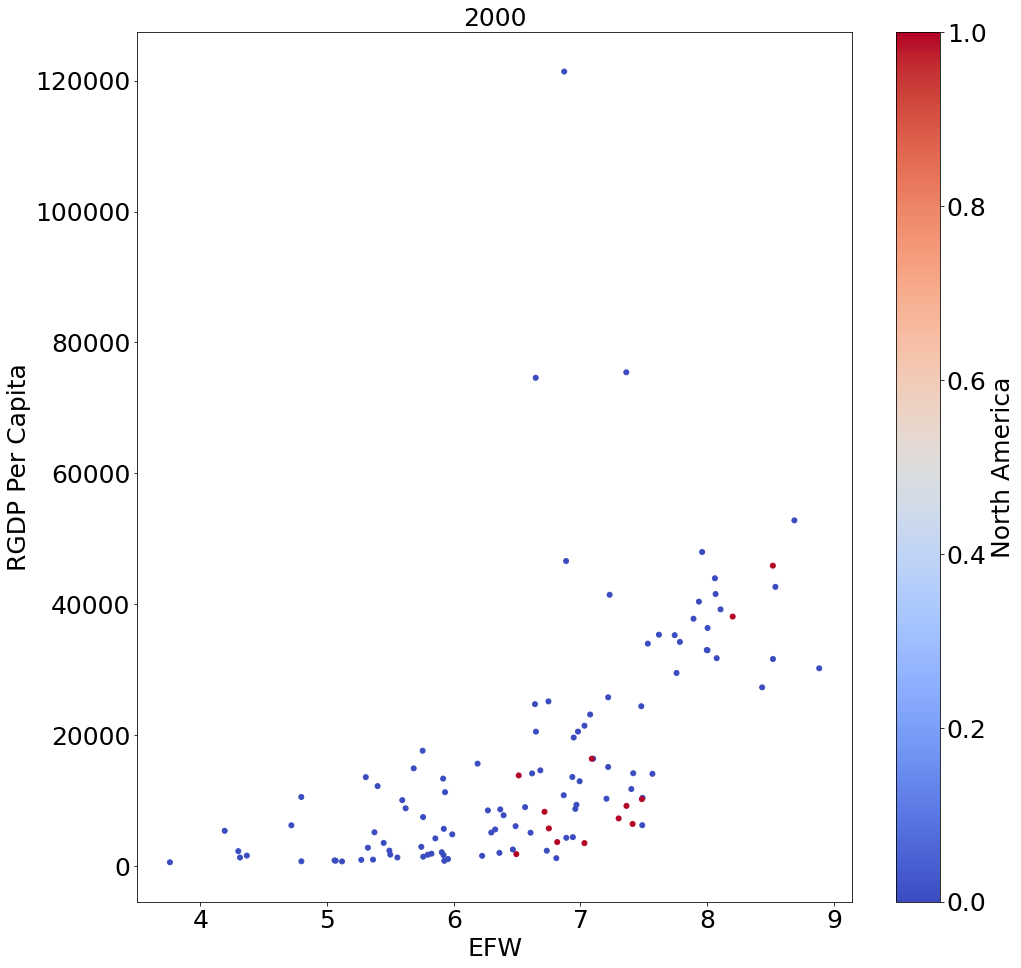

In [14]:
import datetime
year = 2000

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (16, 16))
plot_data.plot.scatter(x = "EFW",
                       y = "RGDP Per Capita",
                       c = "North America",
                      cmap = "coolwarm",
                       ax = ax, s = 25)
ax.set_title(str(year), fontsize = 25)

[0.  0.2 0.4 0.6 0.8 1. ]


<ipython-input-15-d0ebc7967648>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

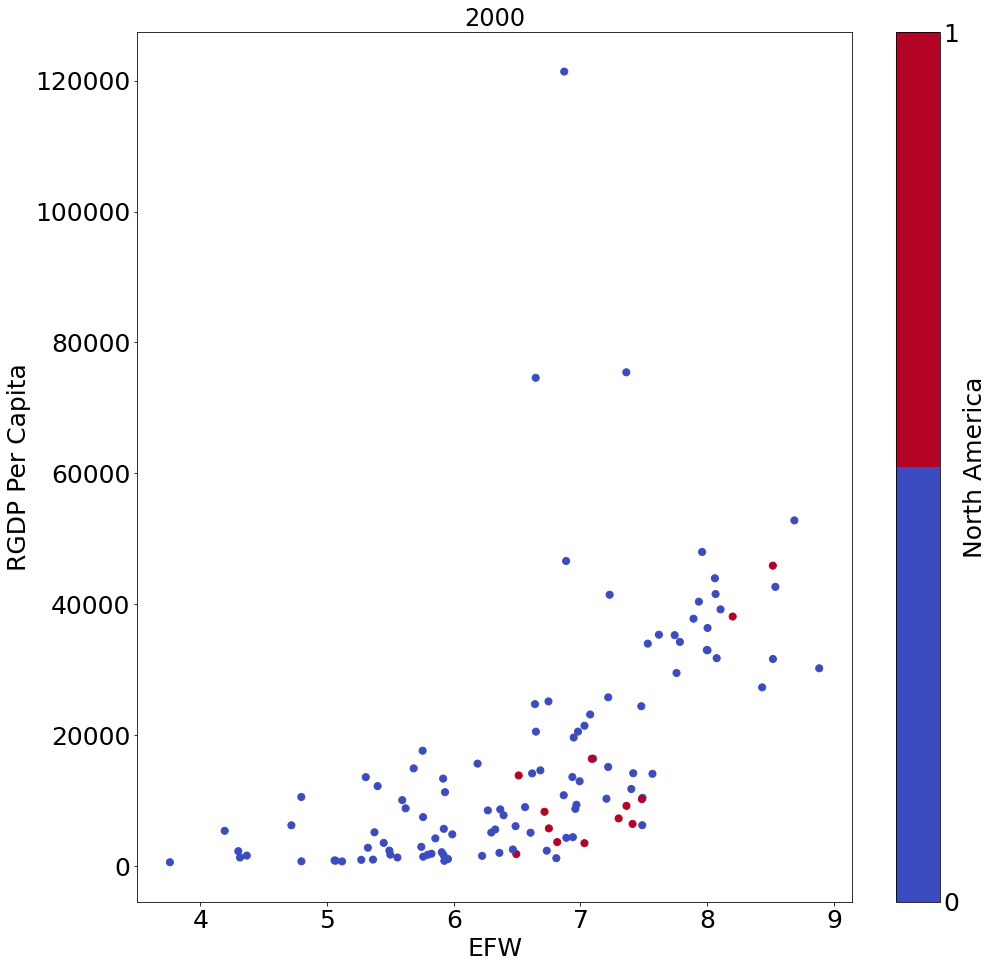

In [15]:
import datetime
from matplotlib import cm

year = 2000
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (16, 16))
plot_data.plot.scatter(x = "EFW",
                       y = "RGDP Per Capita",
                       c = "North America",
                      cmap = cmap,
                       ax = ax,
                       norm = norm,
                       s = 50)

f = plt.gcf()
cax  = f.get_axes()[1]
vals = cax.get_yticks()
print(vals)
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 24)

In [16]:
import pandas as pd  
import numpy as np  

n = 5 
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code",
                                "Year"],   
                   parse_dates = True)
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

In [17]:
import pandas as pd  
import numpy as np  
  
def create_quantile(n, data, year, quantile_var, quantile_name):
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)} 
    for index in data[year_index].index:
        val = data.loc[index][quantile_var]
        for i in range(1, n + 1):
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)
                break  
            else:  
                 continue  

years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

In [18]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code Year                                               
ALB      2017-01-01              NaN                     NaN
         2016-01-01          10342.0                     3.0
         2015-01-01          10032.0                     3.0
         2014-01-01           9808.0                     3.0
         2013-01-01           9660.0                     3.0
...                              ...                     ...
ZWE      2000-01-01           2249.0                     5.0
         1995-01-01           2156.0                     5.0
         1990-01-01           2232.0                     5.0
         1985-01-01           2198.0                     5.0
         1980-01-01           2133.0                     5.0

[3030 rows x 2 columns]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

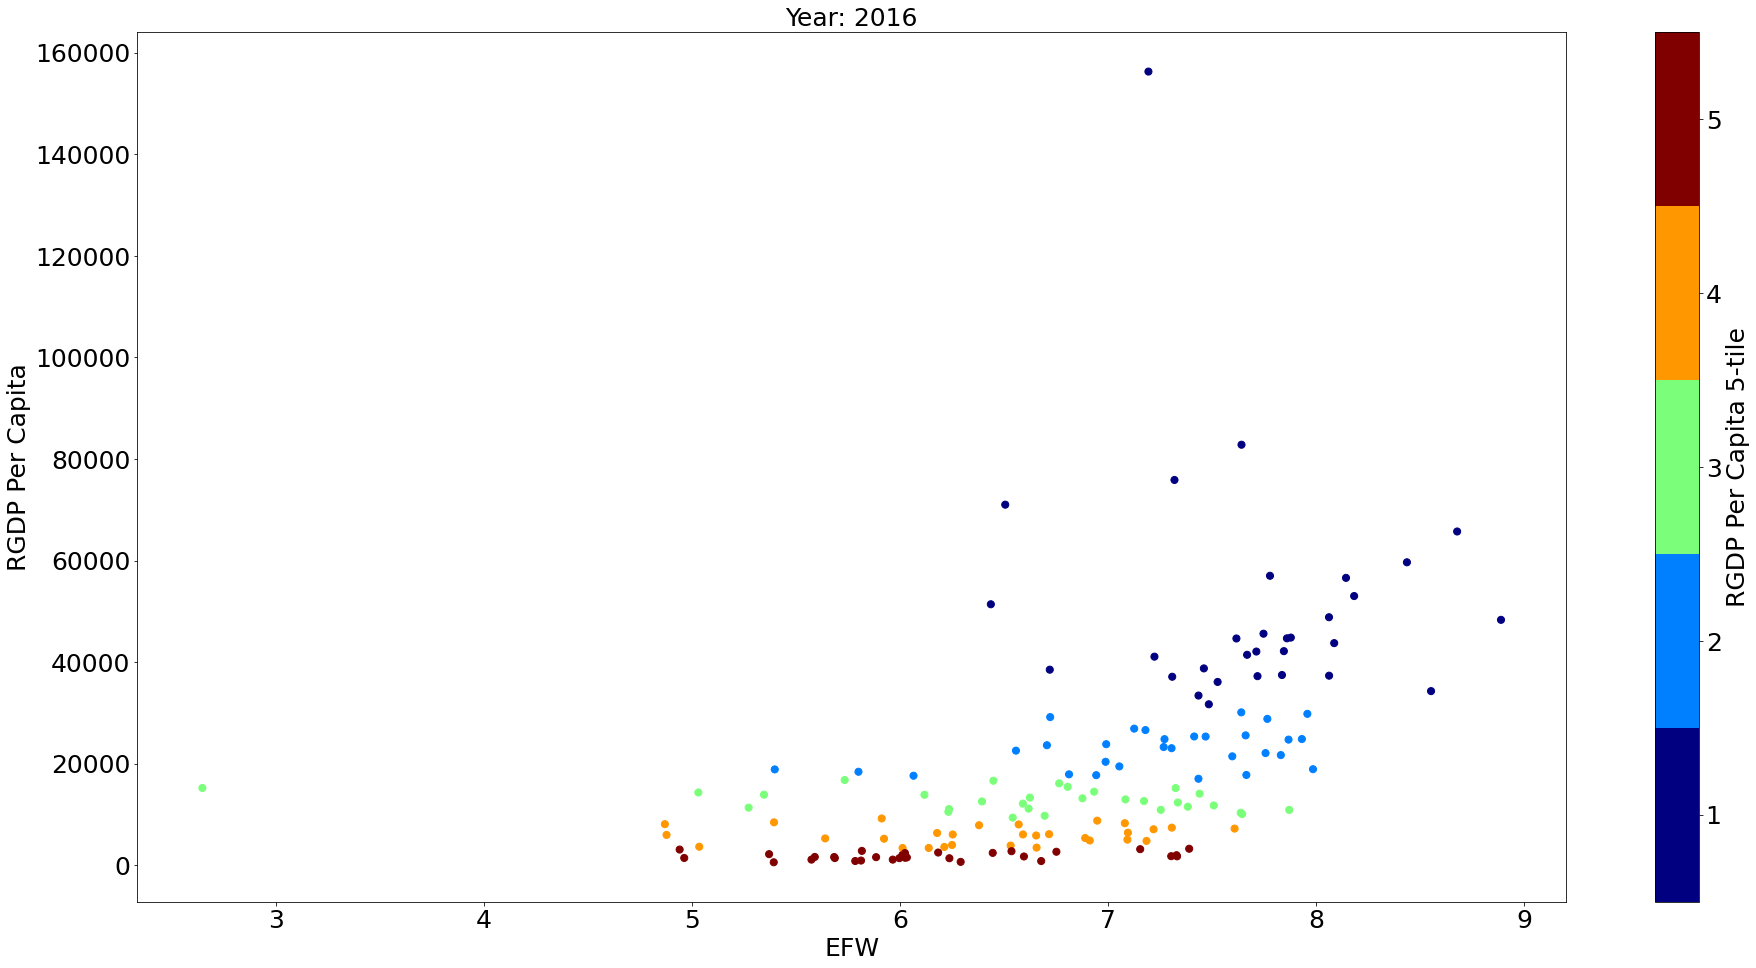

In [19]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (32, 16))
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data.plot.scatter(x = "EFW",
                       y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap,
                       norm = norm,
                       ax = ax,
                       s = 50,
                      legend = False,
                       vmin = 0.5,
                       vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 25)

In [20]:
import pandas as pd  
import numpy as np  
import datetime  
 
data = pd.read_csv("fraserDataWithRGDPPC.csv",
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)

In [21]:
data.loc["USA", :]

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,
2017-01-01,8.196365,7.157599,7.436473,9.799038,7.674580,8.914133,NaN,53015.0
2016-01-01,8.183442,7.138582,7.396209,9.847874,7.653328,8.881217,53015.0,52591.0
2015-01-01,8.085664,7.121655,7.226306,9.761051,7.535949,8.783357,52591.0,51664.0
2014-01-01,7.969703,7.126057,7.099625,9.389649,7.573566,8.659619,51664.0,50863.0
2013-01-01,7.900998,7.097752,6.974508,9.420297,7.374713,8.637721,50863.0,50394.0
2012-01-01,8.012288,7.565472,7.016540,9.323542,7.699527,8.456360,50394.0,49675.0
2011-01-01,7.906265,7.260760,6.957723,9.305630,7.711284,8.295927,49675.0,49267.0
2010-01-01,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905,49267.0,48453.0
2009-01-01,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299,48453.0,50276.0


In [22]:
data.index.get_level_values("Year")

DatetimeIndex(['2017-01-01', '2016-01-01', '2015-01-01', '2014-01-01',
               '2013-01-01', '2012-01-01', '2011-01-01', '2010-01-01',
               '2009-01-01', '2008-01-01',
               ...
               '2005-01-01', '2004-01-01', '2003-01-01', '2002-01-01',
               '2001-01-01', '2000-01-01', '1995-01-01', '1990-01-01',
               '1985-01-01', '1980-01-01'],
              dtype='datetime64[ns]', name='Year', length=3030, freq=None)

In [23]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

In [24]:
data = data[data.index.get_level_values("Year") > datetime.datetime(1999, 1, 1)]

In [25]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
ALB      2017-01-01              NaN              10342.0  
         2016-01-01          10342.0              10032.0  
         2015-01-01          10032.0               9808.0  
         2014-01-01           9808.0               9660.0  
         2013-01-01           9660.0               9592.0  
...                              ...                  ...  
ZWE      2004-01-01           1622.0               1722.0  
         2003-01-01           1722.0               2054.0  
         2002-01-01           2054.0               2228.0  
         2001-01-01           2228.0               2249.0  
         2000-01-01           2249.0               2156.0  

[2589 rows x 8 columns]

In [26]:
for key in data:
    if "GDP" in key:
        data["Log" + key] = np.log(data[key])

In [27]:
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

In [28]:
data_dict["Data"]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  LogRGDP Per Capita  \
ISO_Code Year                                                                   
ALB      2017-01-01              NaN              10342.0                 NaN   
         2016-01-01          10342.0              10032.0            9.243969   
         2015-01-01          10032.0               9808.0            9.213535   
         2014-01-01           9808.0               9660.0            9.190954   
         2013-01-01           9660.0               9592.0            9.175749   
...                              ...                  ...                 ...   
ZWE      2004-01-01           1622.0               1722.0            7.391415   
         2003-01-01           1722.0               2054.0            7.451242   
         2002-01-01           2054.0               2228.0            7.627544   
         2001-01-01           2228.0               2249.0            7.708860   
         2000-01-01           2249.0               2156.0            7.718241   

                     LogRGDP Per Capita Lag  
ISO_Code Year                                
ALB      2017-01-01                9.243969  
         2016-01-01                9.213535  
         2015-01-01                9.190954  
         2014-01-01                9.175749  
         2013-01-01                9.168685  
...                                     ...  
ZWE      2004-01-01                7.451242  
         2003-01-01                7.627544  
         2002-01-01                7.70

In [29]:
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list): 
    data[indicator_name] = 0 
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  

data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)  
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
  
for key in data:  
    if "GDP" in key:  
        data["Log " + key] = np.log(data[key]) 
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()  
 
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)

In [30]:
data_dict[key]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
         2012-01-01  7.332332            8.096375   
...                       ...                 ...   
ZWE      2006-01-01  3.012548            4.770748   
         2005-01-01  2.889240            4.291101   
         2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
         2012-01-01                        4.471492     9.710740   
...                                             ...          ...   
ZWE      2006-01-01                        3.572649     0.000000   
         2005-01-01                        3.487611     0.000000   
         2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
         2012-01-01                          7.115422    7.267629   
...                                               ...         ...   
ZWE      2006-01-01                          2.299270    4.420073   
         2005-01-01                          2.368615    4.298872   
         2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2016-01-01            310.0                224.0   
         2015-01-01            224.0                148.0   
         2014-01-01            148.0                 68.0   
         2013-01-01             68.0                108.0   
         2012-01-01            108.0                212.0   
...                              ...                  ...   
ZWE      2006-01-01            -43.0               -112.0   
         2005-01-01           -112.0               -100.0   
         2004-01-01           -100.0               -332.0   
         2003-01-01           -332.0               -174.0   
         2002-01-01           -174.0                -21.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2016-01-01             0.030433                 0.022582   
         2015-01-01             0.022582                 0.015205   
         2014-01-01             0.015205                 0.007064   
         2013-01-01             0.007064                 0.011323   
         2012-01-01             0.011323                 0.022607   
...                                  ...                      ...   
ZWE      2006-01-01            -0.028890                -0.071550   
         2005-01-01            -0.071550                -0.059826   
         2004-01-01            -0.059826                -0.176303   


In [31]:
data_dict[key].dropna()

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
         2012-01-01  7.332332            8.096375   
...                       ...                 ...   
ZWE      2006-01-01  3.012548            4.770748   
         2005-01-01  2.889240            4.291101   
         2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
         2012-01-01                        4.471492     9.710740   
...                                             ...          ...   
ZWE      2006-01-01                        3.572649     0.000000   
         2005-01-01                        3.487611     0.000000   
         2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
         2012-01-01                          7.115422    7.267629   
...                                               ...         ...   
ZWE      2006-01-01                          2.299270    4.420073   
         2005-01-01                          2.368615    4.298872   
         2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2016-01-01            310.0                224.0   
         2015-01-01            224.0                148.0   
         2014-01-01            148.0                 68.0   
         2013-01-01             68.0                108.0   
         2012-01-01            108.0                212.0   
...                              ...                  ...   
ZWE      2006-01-01            -43.0               -112.0   
         2005-01-01           -112.0               -100.0   
         2004-01-01           -100.0               -332.0   
         2003-01-01           -332.0               -174.0   
         2002-01-01           -174.0                -21.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2016-01-01             0.030433                 0.022582   
         2015-01-01             0.022582                 0.015205   
         2014-01-01             0.015205                 0.007064   
         2013-01-01             0.007064                 0.011323   
         2012-01-01             0.011323                 0.022607   
...                                  ...                      ...   
ZWE      2006-01-01            -0.028890                -0.071550   
         2005-01-01            -0.071550                -0.059826   
         2004-01-01            -0.059826                -0.176303   


In [32]:
import statsmodels.api as sm
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  
  
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name] 
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 8.840e+05
Date:                 Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                         10:59:58   Log-Likelihood:                 3717.6
No. Observations:                 2148   AIC:                            -7429.
Df Residuals:                     2145   BIC:                            -7412.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-32-18570b6a772e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-32-18570b6a772e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [33]:
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 5.904e+05
Date:                 Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                         10:59:58   Log-Likelihood:                 3720.1
No. Observations:                 2148   AIC:                            -7432.
Df Residuals:                     2144   BIC:                            -7410.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-33-0bc005ebcab0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-33-0bc005ebcab0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [34]:
!pip install linearmodels --user

In [35]:
data_dict["Diff Data"].loc["USA"]

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag,Log RGDP Per Capita,Log RGDP Per Capita Lag,North America
Year,,,,,,,,,,,
2016-01-01,8.183442,7.138582,7.396209,9.847874,7.653328,8.881217,424.0,927.0,0.008030,0.017784,1
2015-01-01,8.085664,7.121655,7.226306,9.761051,7.535949,8.783357,927.0,801.0,0.017784,0.015625,1
2014-01-01,7.969703,7.126057,7.099625,9.389649,7.573566,8.659619,801.0,469.0,0.015625,0.009264,1
2013-01-01,7.900998,7.097752,6.974508,9.420297,7.374713,8.637721,469.0,719.0,0.009264,0.014370,1
2012-01-01,8.012288,7.565472,7.016540,9.323542,7.699527,8.456360,719.0,408.0,0.014370,0.008247,1
2011-01-01,7.906265,7.260760,6.957723,9.305630,7.711284,8.295927,408.0,814.0,0.008247,0.016660,1
2010-01-01,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905,814.0,-1823.0,0.016660,-0.036934,1
2009-01-01,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299,-1823.0,-626.0,-0.036934,-0.012374,1
2008-01-01,8.244885,7.496386,7.409211,9.686262,7.998733,8.633830,-626.0,412.0,-0.012374,0.008127,1


In [36]:
!pip install linearmodels

Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.8999
Estimator:                   PanelOLS   R-squared (Between):              0.9937
No. Observations:                2148   R-squared (Within):               0.9053
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.9925
Time:                        11:00:03   Log-likelihood                 -1.74e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2965.0
Entities:                         162   P-value                           0.0000
Avg Obs:                       13.259   Distribution:                  F(6,1978)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):            

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-37-a41fe1803cb1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-a41fe1803cb1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

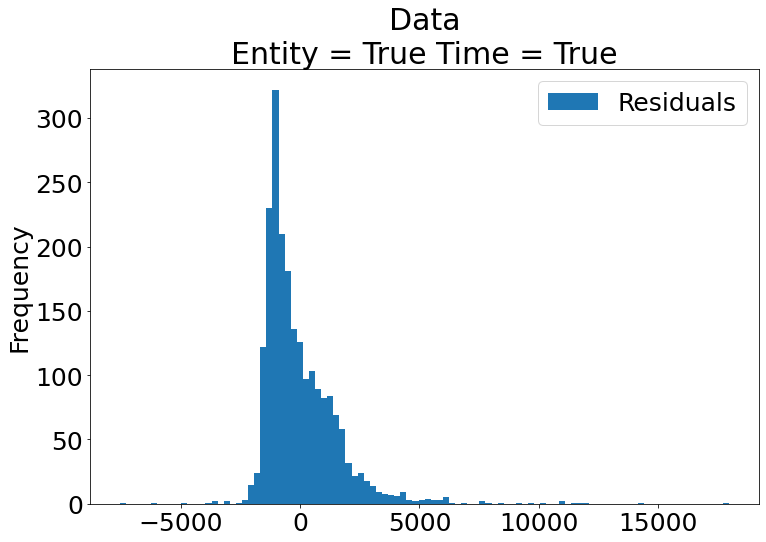

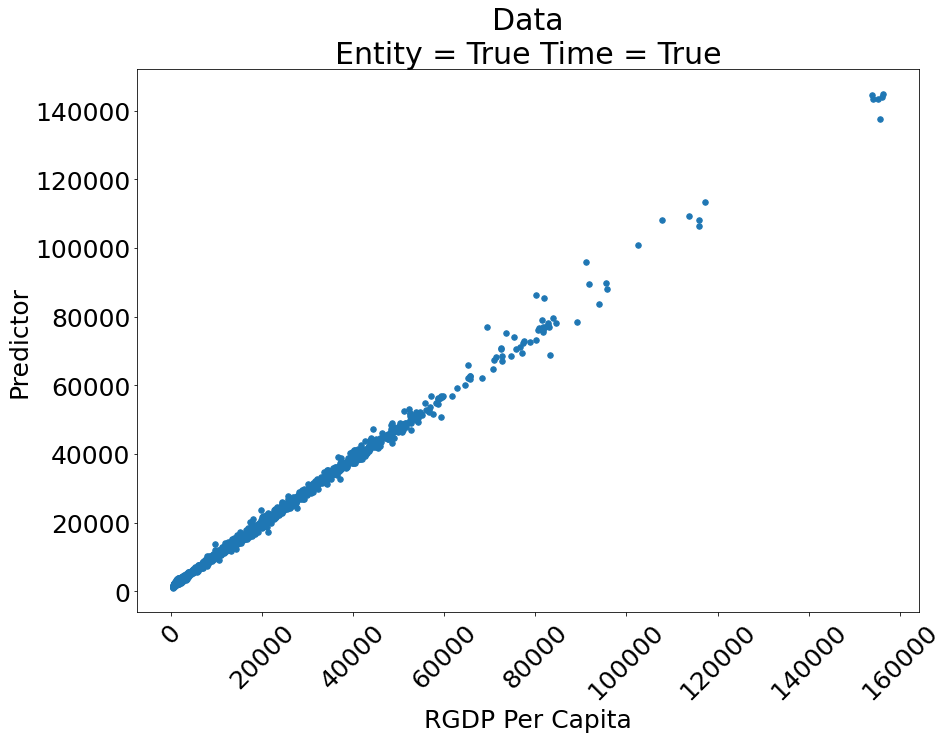

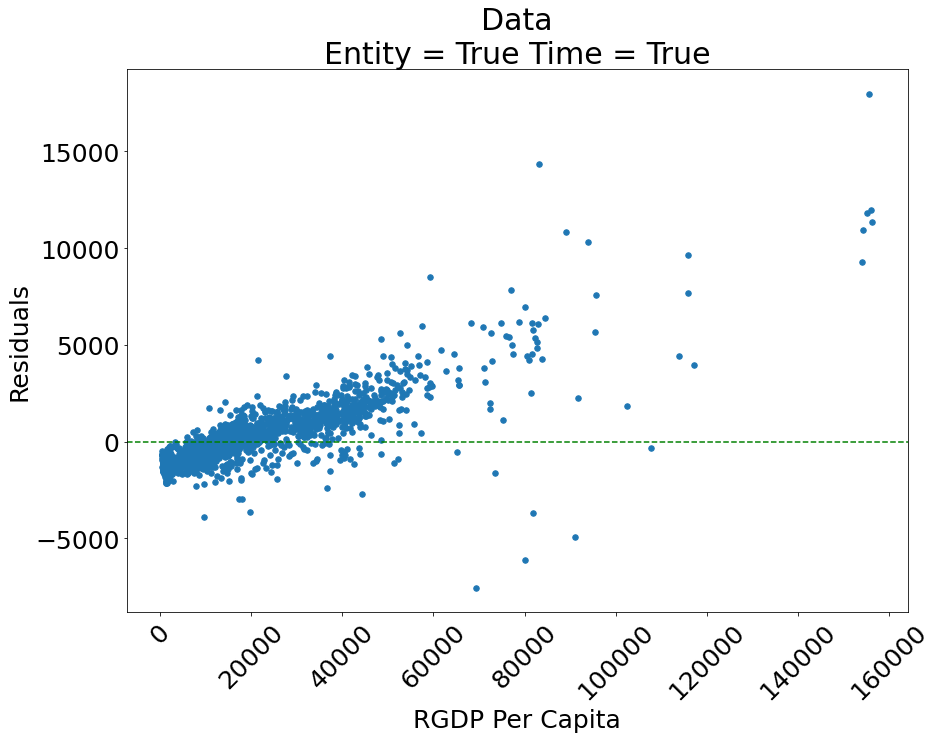

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.9055
Estimator:                   PanelOLS   R-squared (Between):              0.9922
No. Observations:                2148   R-squared (Within):               0.9055
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.9910
Time:                        11:00:04   Log-likelihood                -1.752e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3183.3
Entities:                         162   P-value                           0.0000
Avg Obs:                       13.259   Distribution:                  F(6,1993)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):           

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-37-a41fe1803cb1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-a41fe1803cb1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

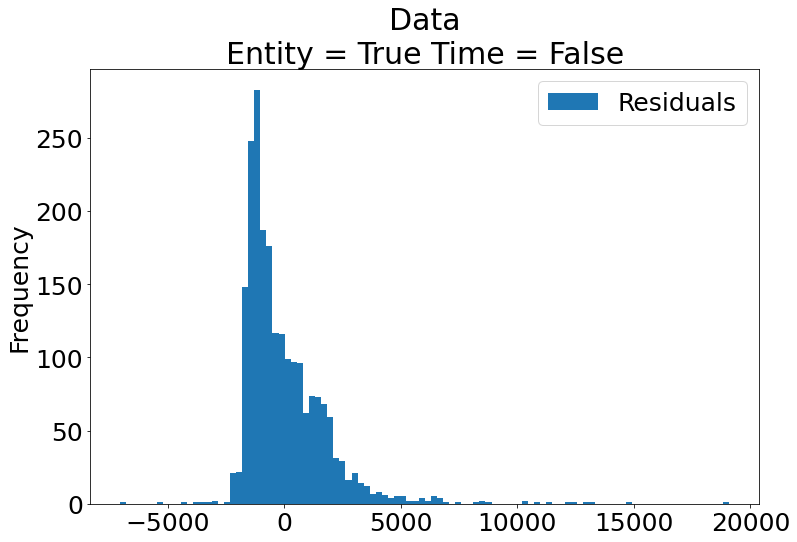

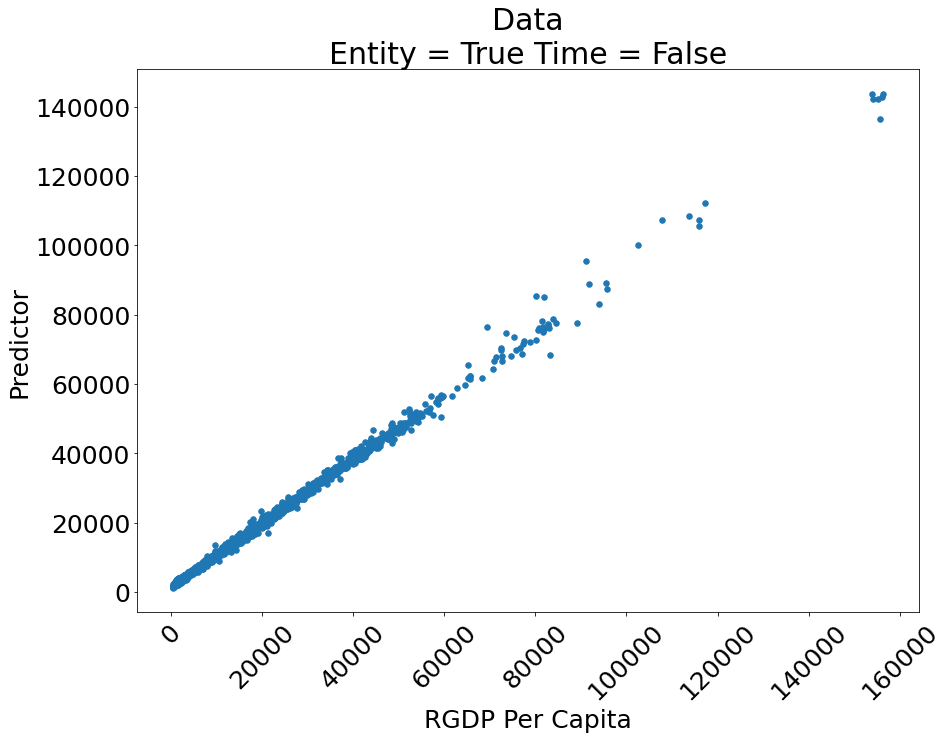

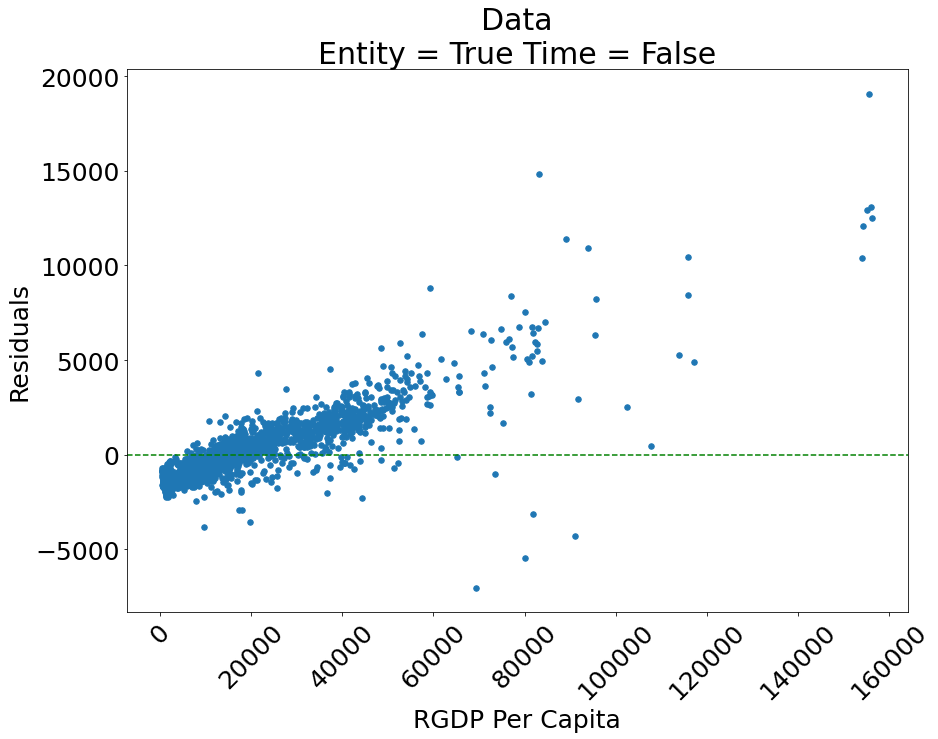

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.9978
Estimator:                   PanelOLS   R-squared (Between):              0.9996
No. Observations:                2148   R-squared (Within):               0.8979
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.9975
Time:                        11:00:05   Log-likelihood                -1.766e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   1.604e+05
Entities:                         162   P-value                           0.0000
Avg Obs:                       13.259   Distribution:                  F(6,2126)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):          7

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-37-a41fe1803cb1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-a41fe1803cb1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

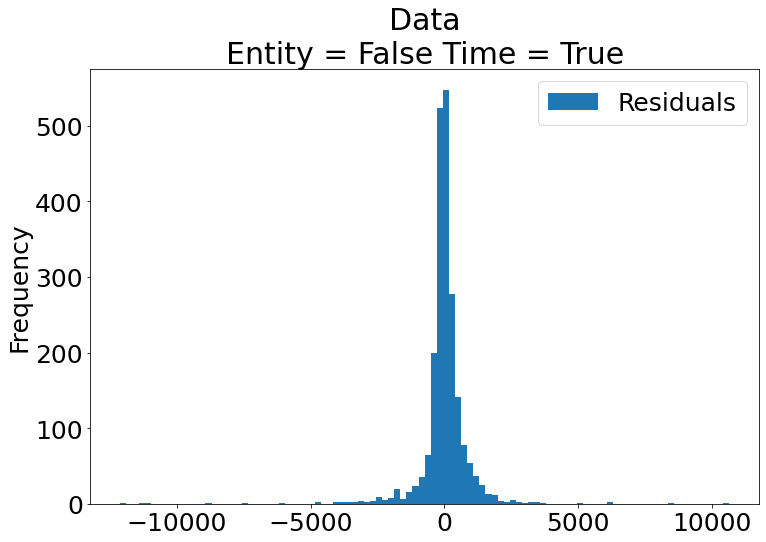

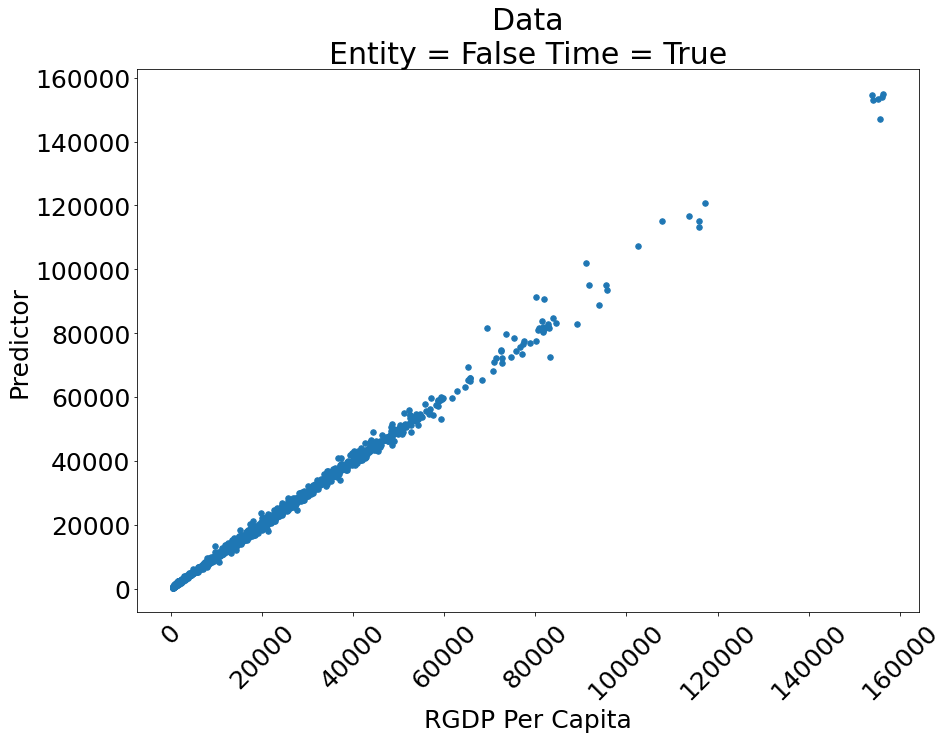

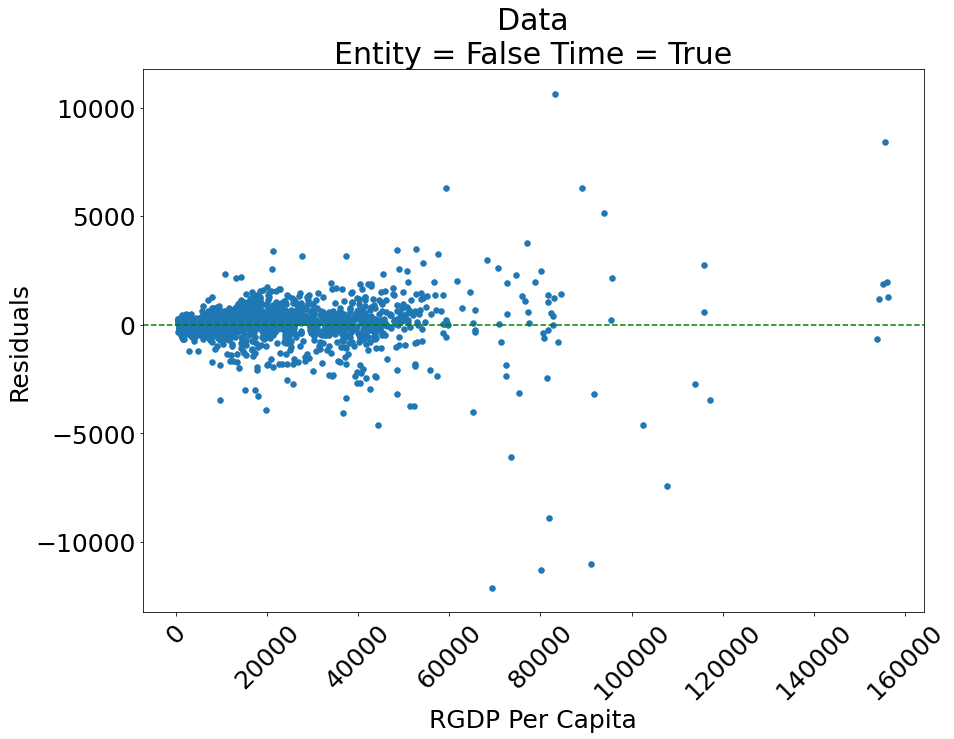

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.9975
Estimator:                   PanelOLS   R-squared (Between):              0.9996
No. Observations:                2148   R-squared (Within):               0.8979
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.9975
Time:                        11:00:05   Log-likelihood                -1.778e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                    1.45e+05
Entities:                         162   P-value                           0.0000
Avg Obs:                       13.259   Distribution:                  F(6,2141)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):          

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-37-a41fe1803cb1>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-a41fe1803cb1>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

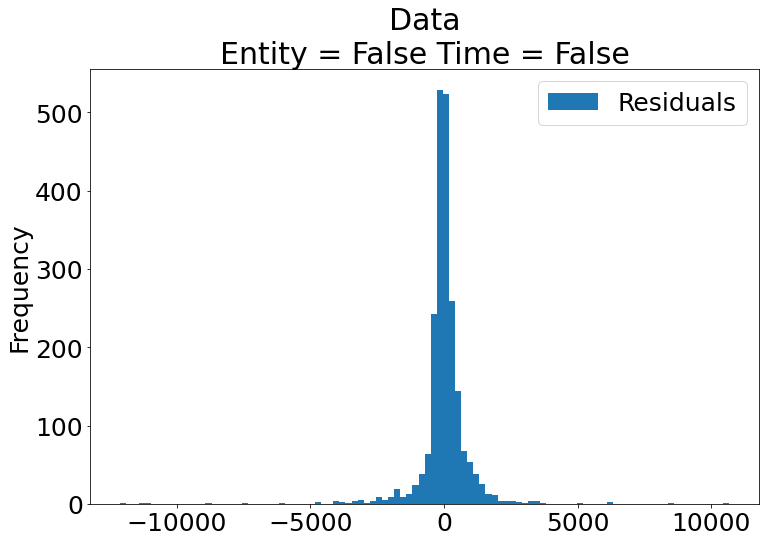

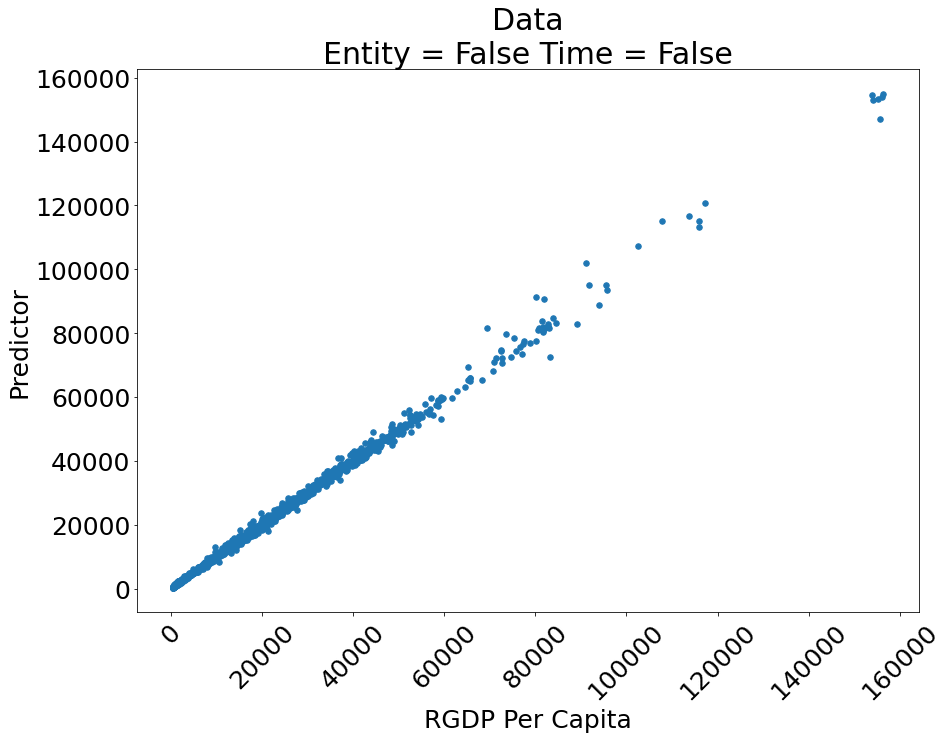

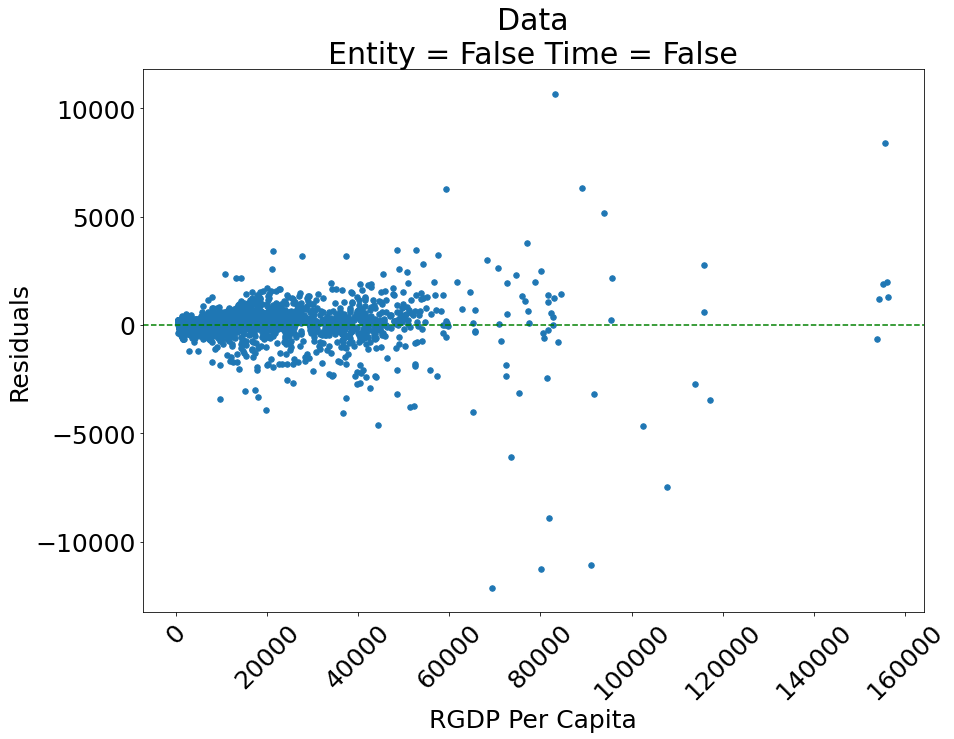

Diff Data
Entity = True
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.2122
Estimator:                   PanelOLS   R-squared (Between):              0.2545
No. Observations:                1999   R-squared (Within):               0.1795
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.1841
Time:                        11:00:06   Log-likelihood                -1.605e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      82.150
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.340   Distribution:                  F(6,1830)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):  

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


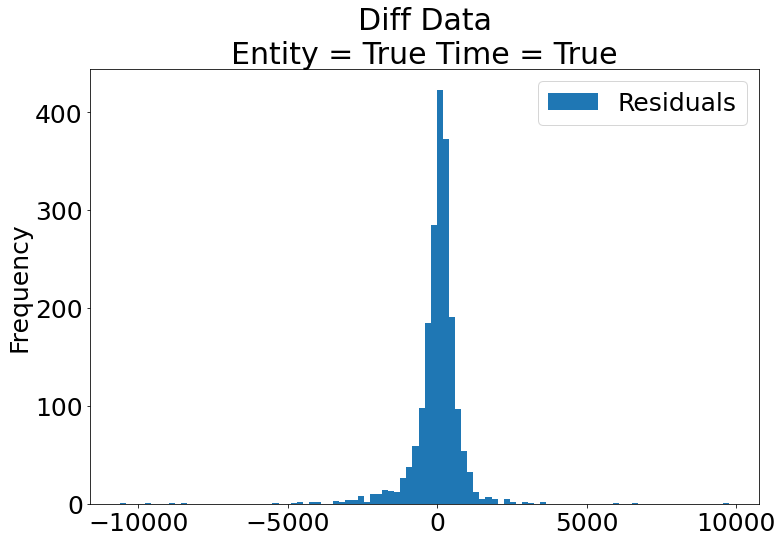

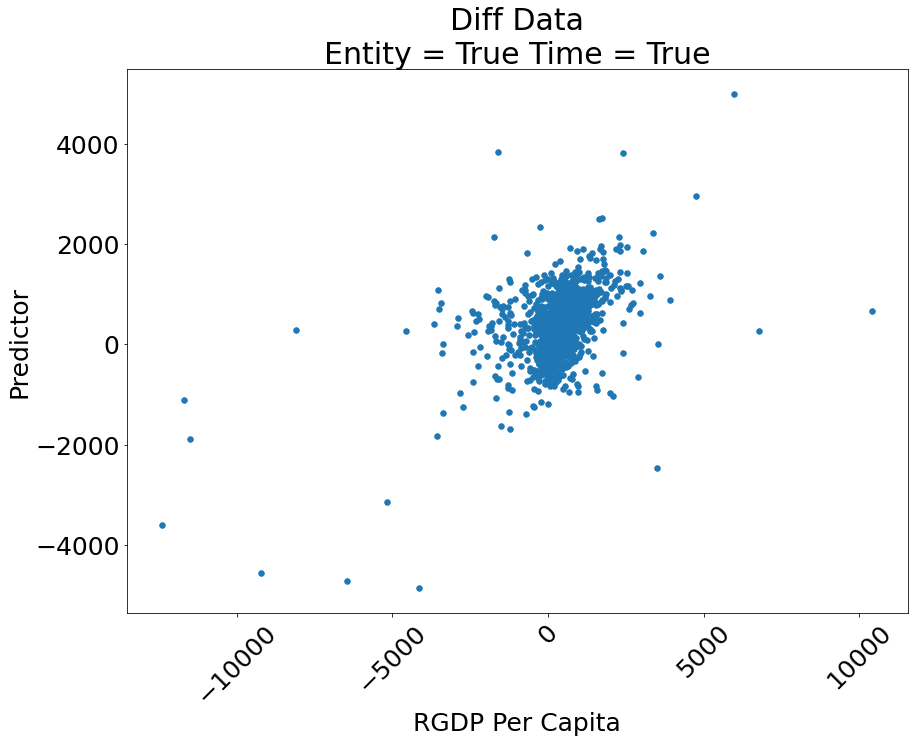

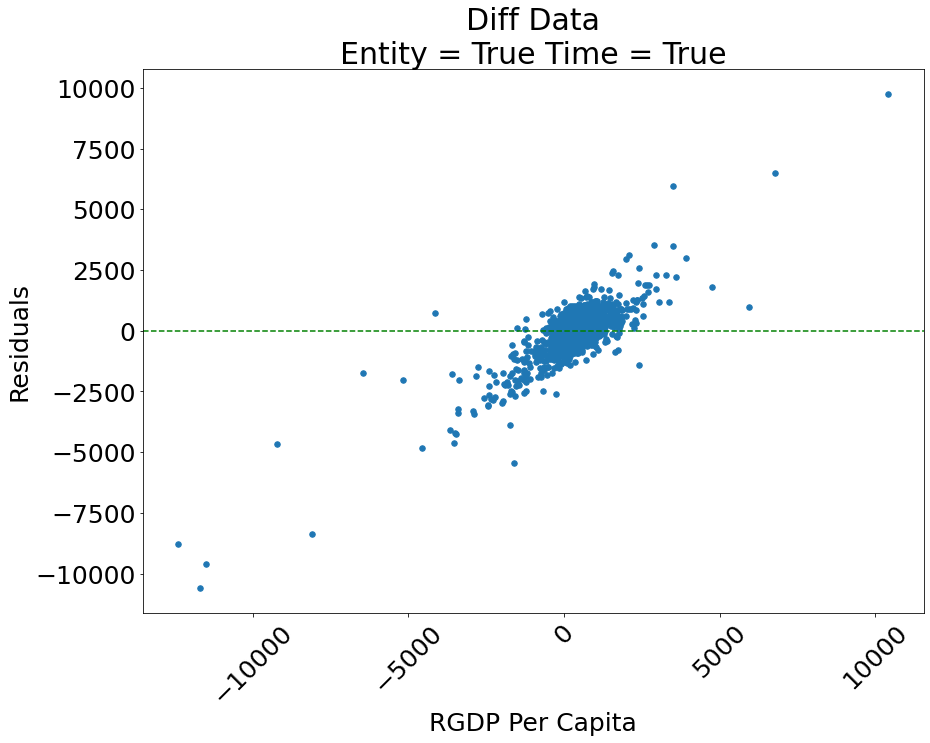

Diff Data
Entity = True
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.1818
Estimator:                   PanelOLS   R-squared (Between):              0.5187
No. Observations:                1999   R-squared (Within):               0.1818
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.2346
Time:                        11:00:07   Log-likelihood                -1.622e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      68.272
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.340   Distribution:                  F(6,1844)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust): 

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


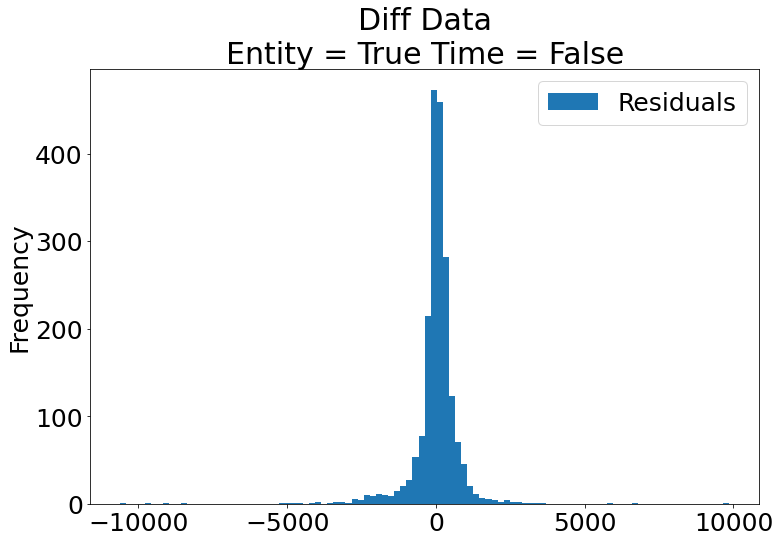

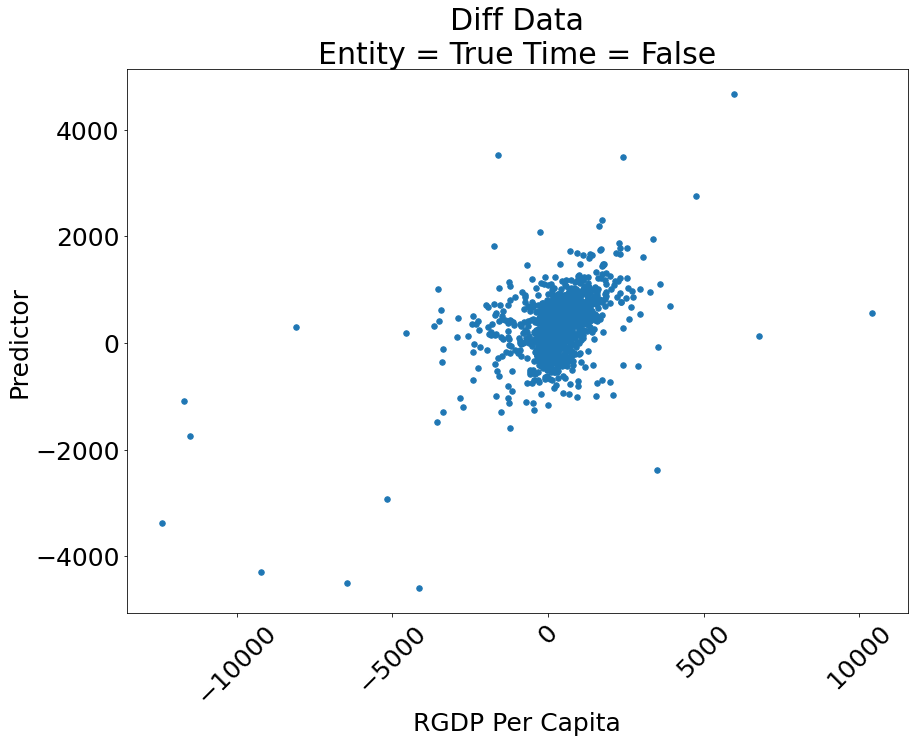

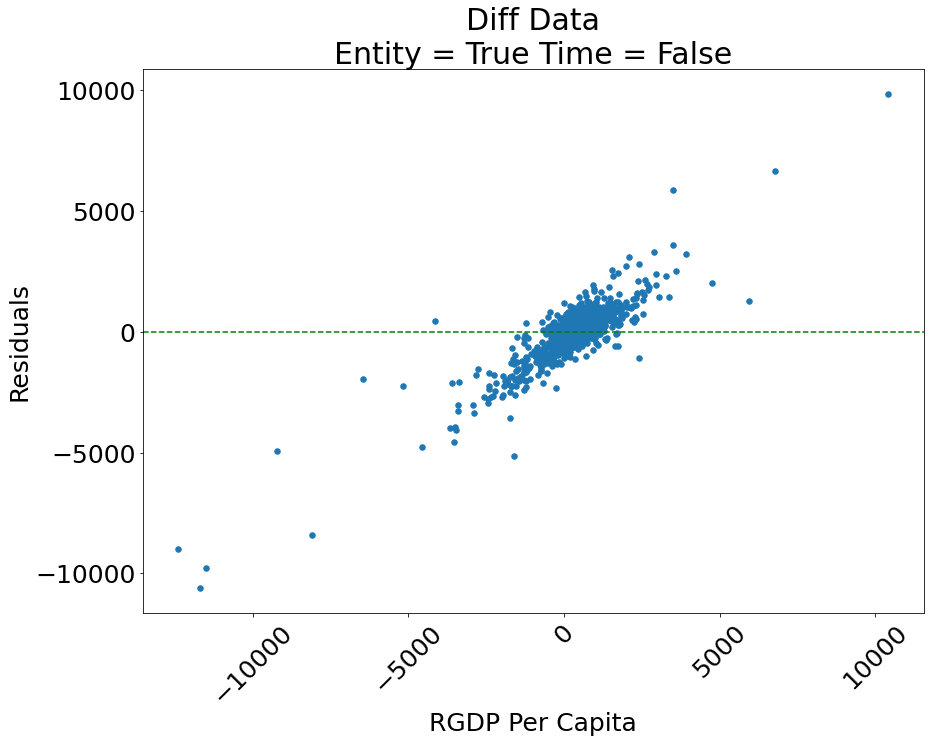

Diff Data
Entity = False
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.3121
Estimator:                   PanelOLS   R-squared (Between):              0.7946
No. Observations:                1999   R-squared (Within):               0.1641
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.2721
Time:                        11:00:07   Log-likelihood                -1.612e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      149.56
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.340   Distribution:                  F(6,1978)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust): 

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


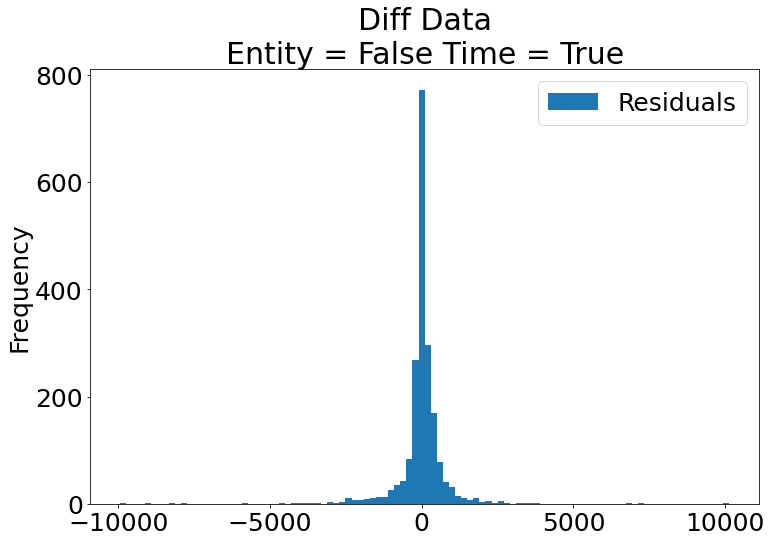

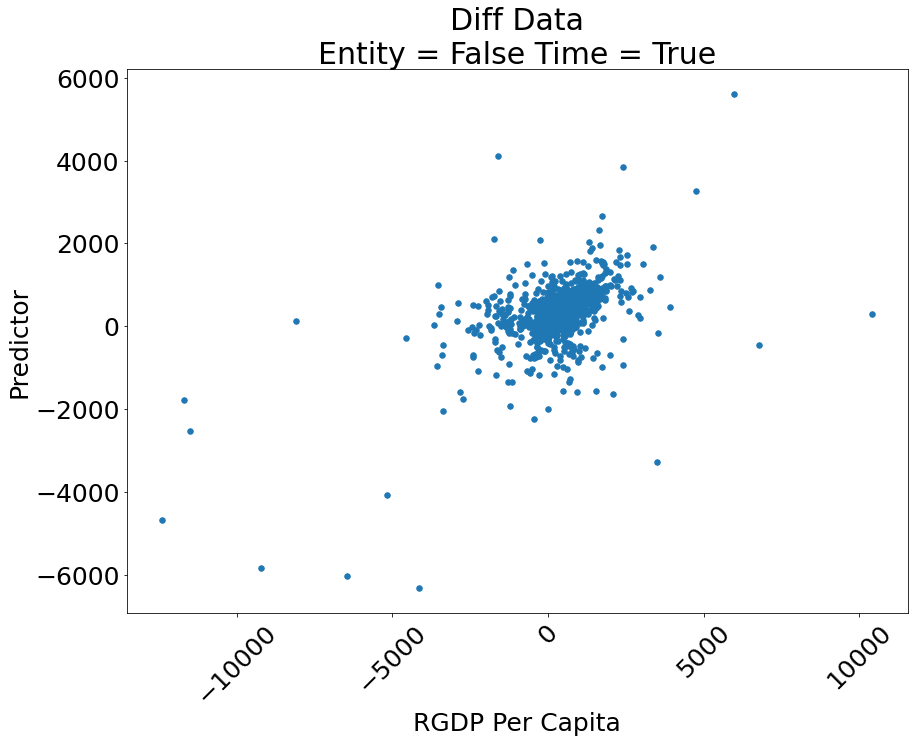

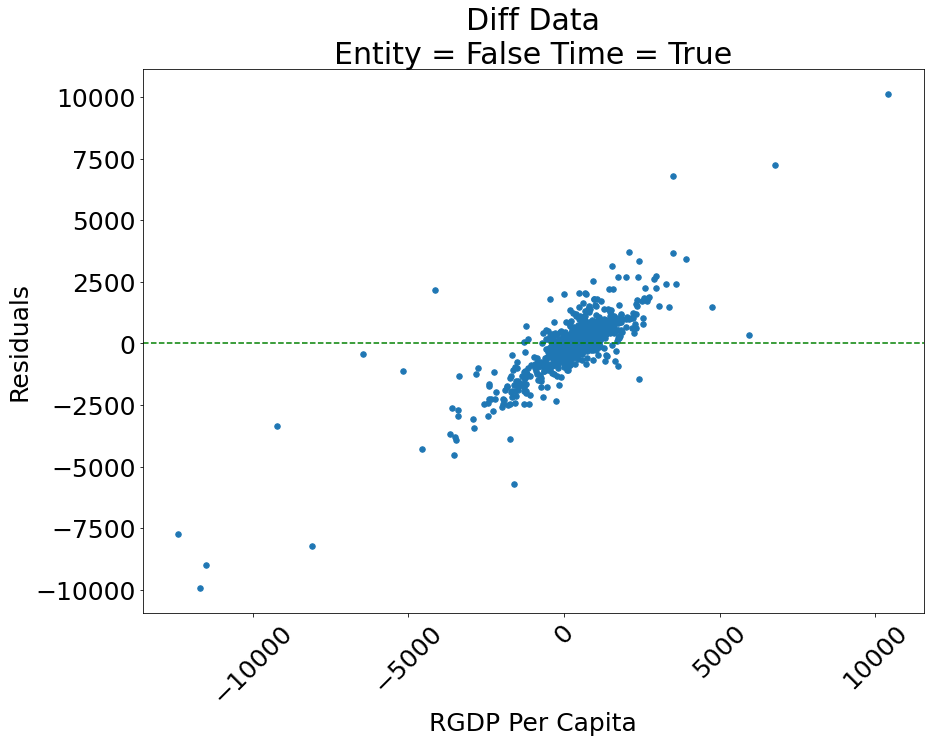

Diff Data
Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.2735
Estimator:                   PanelOLS   R-squared (Between):              0.7746
No. Observations:                1999   R-squared (Within):               0.1707
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.2735
Time:                        11:00:08   Log-likelihood                -1.629e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      124.96
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.340   Distribution:                  F(6,1992)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):

<ipython-input-37-a41fe1803cb1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


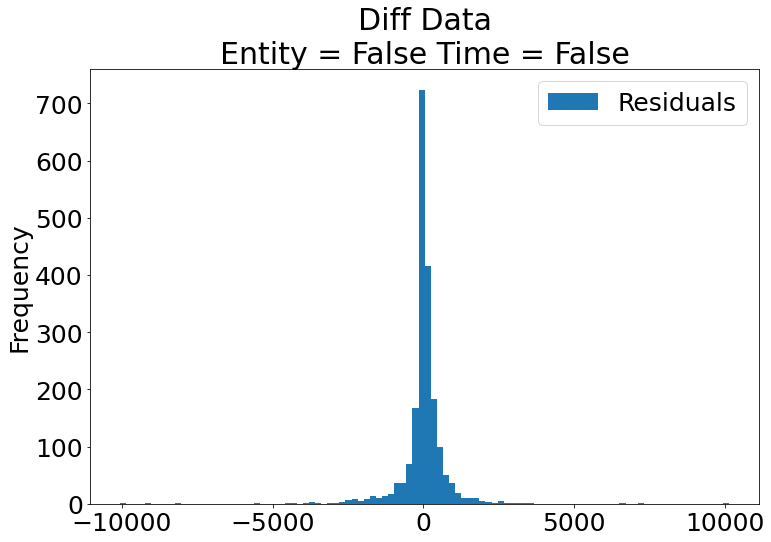

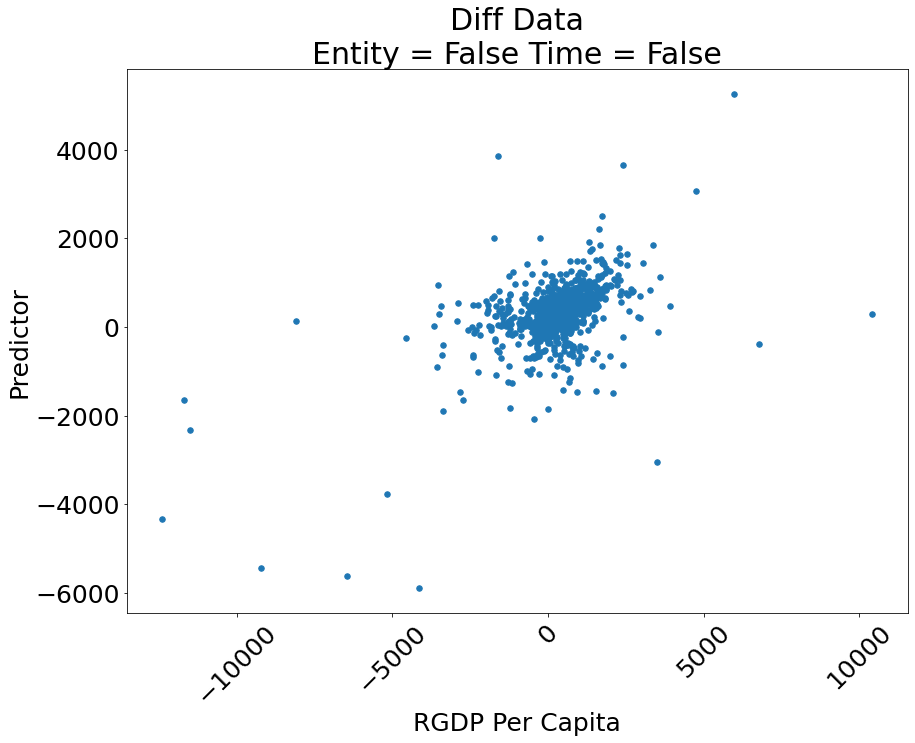

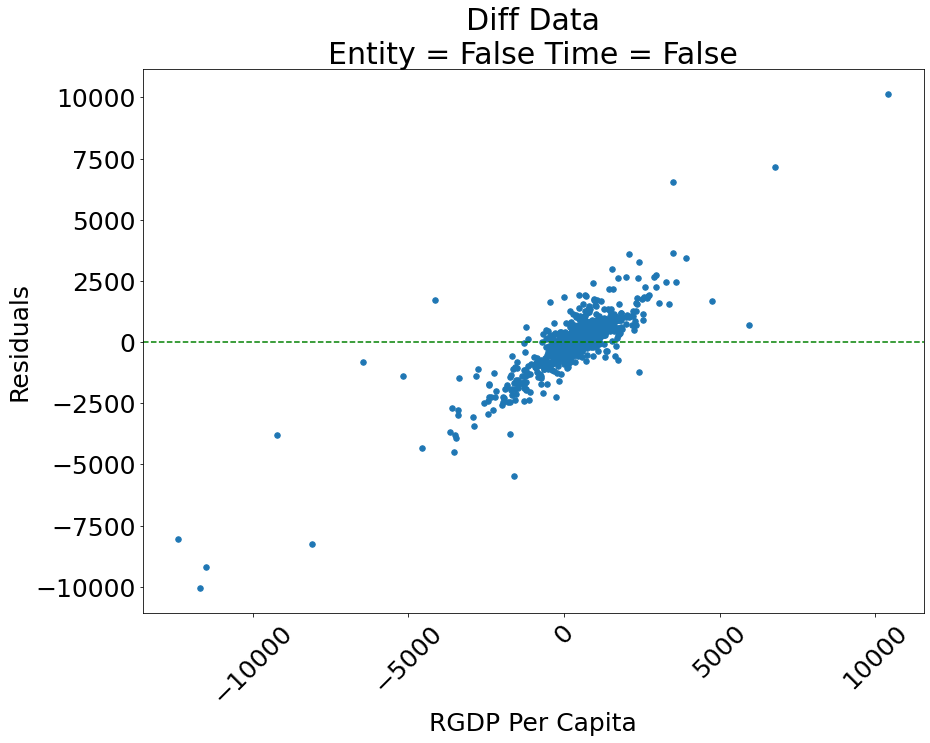

In [37]:
from linearmodels import PanelOLS
# . . . .
y_name = ["RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]

for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation = 45)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "green")
            plt.xticks(rotation = 45)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

In [38]:
from linearmodels import PanelOLS
y_name = ["RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation",
          "RGDP Per Capita Lag"]
for key, data in data_dict.items():
    reg_data = data_dict[key].dropna()
    Y = reg_data[y_name]
    X = reg_data[X_names]
    X["Constant"] = 1     
    model = PanelOLS(Y,
                     X,
                     entity_effects=True,
                     time_effects=True)
    results = model.fit(cov_type='clustered',
                        cluster_entity=True)
    print(key,
          results,
          sep ="\n")

Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.8999
Estimator:                   PanelOLS   R-squared (Between):              0.9937
No. Observations:                2148   R-squared (Within):               0.9053
Date:                Thu, Nov 04 2021   R-squared (Overall):              0.9925
Time:                        11:00:08   Log-likelihood                 -1.74e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2965.0
Entities:                         162   P-value                           0.0000
Avg Obs:                       13.259   Distribution:                  F(6,1978)
Min Obs:                       0.0000                                           
Max Obs:                       16.000   F-statistic (robust):             3184.4
                       

<ipython-input-38-c8264a460aa0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-38-c8264a460aa0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
